<a href="https://colab.research.google.com/github/LauraCatarina/MBA-Ciencia-de-Dados/blob/main/Mat%C3%A9ria%3A%20An%C3%A1lise%20Preditiva%20e%20Data%20Mining/Testes%20em%20Sala/Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#etapa 1
!pip install pandas scikit-learn tensorflow matplotlib # exclamação força a instalação no ambiente Colab

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia no teste: 0.71
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[75 24]
 [21 34]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        99
           1       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



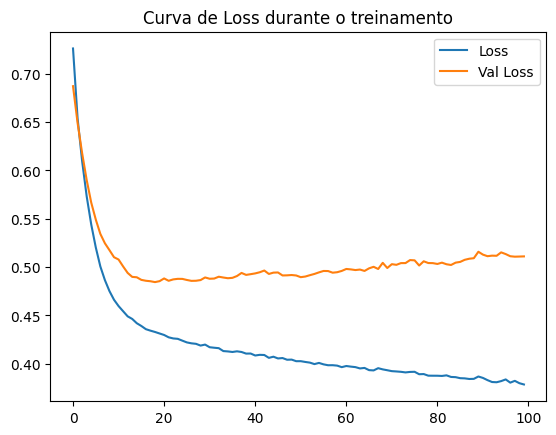

In [ ]:
# etapa 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Carregando o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colunas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=colunas)

# 2. Pré-processamento
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Criando a Rede Neural com Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Treinamento
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# 5. Avaliação
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {acc:.2f}")

# 6. Relatório
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7. Visualização do aprendizado
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Curva de Loss durante o treinamento')
plt.show()
